In [64]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import math 

In [162]:
from fitter import Fitter, get_common_distributions, get_distributions
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from mpl_toolkits.mplot3d import axes3d
import geopy.distance

Maggies Code

In [139]:
amb_df = pd.read_csv('ProjectData-OHCAs.csv', index_col = [0])
amb_df['Travel_Time'] = amb_df['Amb_Arrival_Time'] - amb_df['Dispatch_Time']
amb_df = amb_df[amb_df['Travel_Time']<24]

In [140]:
geometry = [Point(xy) for xy in zip(amb_df['Lon'],amb_df['Lat'])]
gdf = GeoDataFrame(amb_df, geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Quesiton 6

Side length of square: 0.008


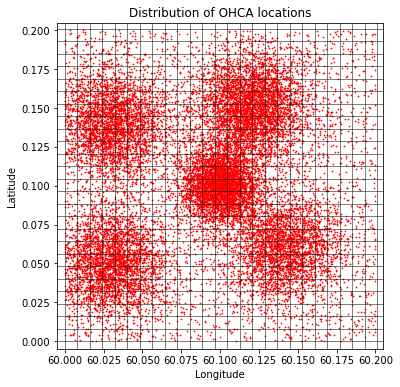

In [147]:
lat_width = ((amb_df['Lat'].max()+0.0001)-(amb_df['Lat'].min()-0.001))/25
lat_ticks = []
x=amb_df['Lat'].min()
while x<amb_df['Lat'].max()+lat_width:
    lat_ticks.append(x)
    x+=lat_width
    
lon_width = (amb_df['Lon'].max()-amb_df['Lon'].min())/25
lon_ticks = []
i=amb_df['Lon'].min()
while i<amb_df['Lon'].max()+lat_width:
    lon_ticks.append(i)
    i+=lat_width
print("Side length of square:", round(lat_width,3))
plotted = gdf.plot(ax=world.plot(figsize=(10,6)),marker='o', color = 'red', markersize=0.5)
plotted.set_ylim(amb_df['Lat'].min()-0.005, amb_df['Lat'].max()+0.005)
plotted.set_xlim(amb_df['Lon'].min()-0.005, amb_df['Lon'].max()+0.005)
plotted.set(title='Distribution of OHCA locations', xlabel='Longitude', ylabel='Latitude')

for l in lon_ticks:
    plt.axvline(x=l,color='black', linewidth = 0.5)
for l in lat_ticks:
    plt.axhline(y=l,color='black', linewidth = 0.5)
grid_dict = {}
num=0

for y in range(0,len(lat_ticks)-1,1):
    for x in range(0, len(lon_ticks)-1,1):
        grid_dict[num] = [[lon_ticks[x],lon_ticks[x+1]],[lat_ticks[y],lat_ticks[y+1]]]
        num+=1

In [148]:
prop_points = []
P = np.zeros((25,25))

count = 0
lon_list= amb_df['Lon'].tolist()
lat_list=amb_df['Lat'].tolist()
for key in grid_dict.keys():
    count = 0
    for ind in range(0,len(lon_list)):
        if (grid_dict[key][0][0]<=lon_list[ind] < grid_dict[key][0][1]) and (grid_dict[key][1][0]<=lat_list[ind] < grid_dict[key][1][1]):
            count+=1
    prop_points.append(count/len(amb_df['Lon'].tolist()))

In [143]:
prop_array = np.array(prop_points).reshape(-1,25)
P = prop_array[::-1]

vals = np.arange(0,26,2)

x_t =[]
y_t=[]
for i in range(0,len(lon_ticks),2):
    x_t.append(round(lon_ticks[i+1],3))
    y_t.append(round(lat_ticks[i+1],3))
y_t = y_t[::-1]

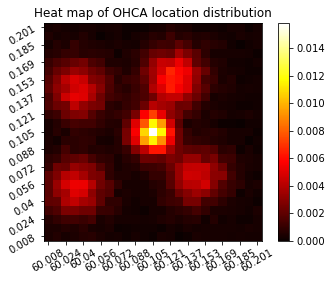

In [204]:
prop_array = np.array(prop_points).reshape(-1,25)
P = prop_array[::-1]

vals = np.arange(0,26,2)

x_t =[]
y_t=[]
for i in range(0,len(lon_ticks),2):
    x_t.append(round(lon_ticks[i+1],3))
    y_t.append(round(lat_ticks[i+1],3))
y_t = y_t[::-1]

plt.xticks(ticks = vals, labels=x_t, rotation = 30)
plt.yticks(ticks = vals, labels=y_t, rotation = 30)
plt.title('Heat map of OHCA location distribution')
plt.imshow(P, cmap= 'hot')
plt.colorbar()
plt.show()


### Question 7

In [3]:
ohca_data = pd.read_csv('ProjectData-OHCAs.csv')
volunteer_data = pd.read_csv('ProjectData-VolunteerResponses.csv')

In [4]:
# get all the time stamps of the ambulance
dispatch_times = np.floor(ohca_data["Dispatch_Time"])
dispatch_times

0             8.0
1            20.0
2            20.0
3            32.0
4            38.0
           ...   
19172    131012.0
19173    131028.0
19174    131032.0
19175    131032.0
19176    131037.0
Name: Dispatch_Time, Length: 19177, dtype: float64

In [5]:
for i in range(len(dispatch_times)):
    while dispatch_times[i]>168:
        dispatch_times[i]-=168

In [6]:
counts = np.zeros(169)
for i in range(len(dispatch_times)):
    counts[int(dispatch_times[i])] += 1

In [7]:
MLEs = counts/(1*780)
MLEs = pd.DataFrame(MLEs)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
MLEs

,0
0,0.000000
1,0.041026
2,0.035897
3,0.023077
4,0.021795
5,0.020513
6,0.041026
7,0.064103
8,0.105128
9,0.247436


Text(0, 0.5, 'Rate')

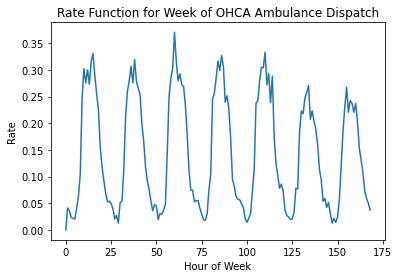

In [8]:
plt.plot(MLEs,'-')
plt.title('Rate Function for Week of OHCA Ambulance Dispatch')
plt.xlabel('Hour of Week')
plt.ylabel('Rate')

### Question 8

In [193]:
# simulate arrival times for one week
MLEs = np.array(MLEs)
lambda_max = max(MLEs) # max lambda
N = 100000
N_lam = int(2*168*lambda_max) 
times = []

for i in range(N):
    T0 = 0
    for t in range(N_lam):
        # accept a point with the probability of lambda/lambda*
        if np.random.uniform(0,1) <= MLEs[t] / lambda_max: 
            # generate inter arrival time and multiply by 60 for the minutes
            random_exp = float(np.random.exponential(lambda_max)*60) 
            T0 += random_exp
            times.append(T0)
        # stop when you have arrivals for one week
        if T0>10080: 
            break


In [194]:
# generate random location grids
locs = np.random.choice(list(grid_dict.keys()),size=len(times),p=prop_points)
# generate points within each grid, since they are uniformly distributed
points = []
for i in locs:
    longitude = np.random.uniform(grid_dict[i][0][0],grid_dict[i][0][1])
    latitude = np.random.uniform(grid_dict[i][1][0],grid_dict[i][1][1])
    points.append((latitude,longitude))

In [195]:
# find the indices that are within 5 minutes of each other
close_time = []
for i in range(len(times)-1):
    if times[i+1]-times[i]<=5:
        close_time.append((i,i+1))

In [196]:
# create function to find distance between two points in latitude and longitude format
def distance(point1,point2):
    return(geopy.distance.geodesic(point1, point2).km*1000)

In [197]:
# for all the dispatches within 5 minutes, find which ones are within 500m of each other
close_locations = []
for (a,b) in indices:
    if distance(points[a],points[b])<=500:
        close_locations.append(a)
        close_locations.append(b)

In [203]:
# find probability of them being within 5 minutes and 500m
print('The probability of dispatches happening within 5 minutes of each other and within 500m of each other is '
      + str(len(close_locations)/len(locs)))

The probability of dispatches happening within 5 minutes of each other and within 500m of each other is 3.9774241405780786e-07
